<img src='http://drive.google.com/uc?export=view&id=1BoSI6ZAmGc3mvjUZWGiUw9IZaPaWbV6Y' width=200>

***

# Data Challenge II

> Welcome to data challenge II. In this challenge we will break into groups to work on two large datasets. The goal will be to gain the highest prediction, while being able to explain how the model is making those predictions.

Congradualtions you've just been hired by the local school board to help them make decision about how to reduce alchohol consuption in high schoolers. They have provided you with a dataset collected over the last year from anonymous students. They would like to know the following:
 
1. Can you build a model to help identify individuals that might be high drinkers?

2. What are some of the most important factors leading to these predictions?


https://www.kaggle.com/uciml/student-alcohol-consumption?select=student-mat.csv

In [ ]:
import pandas as pd
import numpy as np

import sklearn as sk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [ ]:
df = pd.read_csv('/content/student-mat.csv')

#df=df.sample(frac=1)

df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


## Data wrangling

Make a copy before wrangling your data

In [ ]:
#keep a copy of the original dataframe
df_original = df.copy()

#df_original.to_csv('student_matp.csv',index=False)

One hot encoding

In [ ]:
#categorical variables
cat_names = ['Mjob','Fjob','reason','guardian']

#create dummy variables
df_cat = pd.get_dummies(df[cat_names])

#add them back to the original dataframe
df = pd.concat([df,df_cat], axis=1)

#remove the old columns
df = df.drop(cat_names, axis=1)

#take a look
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,GP,F,18,U,GT3,A,4,4,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
1,GP,F,17,U,GT3,T,1,1,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
2,GP,F,15,U,LE3,T,1,1,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
3,GP,F,15,U,GT3,T,4,2,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,GP,F,16,U,GT3,T,3,3,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1
391,MS,M,17,U,LE3,T,3,1,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0
392,MS,M,21,R,GT3,T,1,1,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1
393,MS,M,18,R,LE3,T,3,2,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

#get the columns names of features you'd like to turn into 0/1
bin_names = ['sex','famsize','address','school','Pstatus','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']

#create a dataframe of those features
bin_features = df[bin_names]

#fit the scaler to those data
bin_scaler = OrdinalEncoder().fit(bin_features.values)

#use the scaler to transform your data
bin_features = bin_scaler.transform(bin_features.values)

#put these scaled features back into your transformed features dataframe
df[bin_names] = bin_features

#take a look
df


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0.0,0.0,18,1.0,0.0,0.0,4,4,2,2,0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,4,3,4,1,1,3,6,5,6,6,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
1,0.0,0.0,17,1.0,0.0,1.0,1,1,1,2,0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,5,3,3,1,1,3,4,5,5,6,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
2,0.0,0.0,15,1.0,1.0,1.0,1,1,1,2,3,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,4,3,2,2,3,3,10,7,8,10,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
3,0.0,0.0,15,1.0,0.0,1.0,4,2,1,3,0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3,2,2,1,1,5,2,15,14,15,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,0.0,0.0,16,1.0,0.0,1.0,3,3,1,2,0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,4,3,2,1,2,5,4,6,10,10,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1.0,1.0,20,1.0,1.0,0.0,2,2,1,2,2,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,5,5,4,4,5,4,11,9,9,9,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1
391,1.0,1.0,17,1.0,1.0,1.0,3,1,2,1,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2,4,5,3,4,2,3,14,16,16,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0
392,1.0,1.0,21,0.0,0.0,1.0,1,1,1,1,3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5,5,3,3,3,3,3,10,8,7,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1
393,1.0,1.0,18,0.0,1.0,1.0,3,2,3,1,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,4,4,1,3,4,5,0,11,12,10,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0


In [ ]:
#split data into predictors (X) and target (y)
X = df.drop(['Dalc','Walc'], axis=1)
y = df['Dalc']

#split these data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
#first create a new copy of your dataframe to hold the transformed values
X_train_transformed = X_train.copy()

In [ ]:
from sklearn.preprocessing import StandardScaler

#get the column names of the features you'd like to scale
num_names = X_train_transformed.select_dtypes('number').columns.to_list()

#create a dataframe of those features
num_features = X_train_transformed[num_names]

#fit the scaler to those data
num_scaler = StandardScaler().fit(num_features.values)

#use the scaler to transform your data
num_features = num_scaler.transform(num_features.values)

#put these scaled features back into your transformed features dataframe
X_train_transformed[num_names] = num_features

In [ ]:
df.romantic.value_counts()

0.0    263
1.0    132
Name: romantic, dtype: int64

# Data Visualization and Exploration

Let's look at the distribution of the variable we are trying to predict.

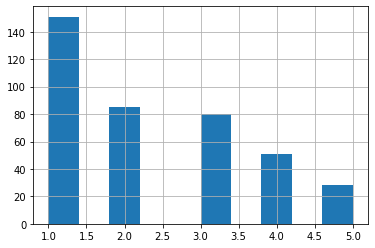

In [ ]:
df.Walc.hist()

## Model building and fitting

### Hyperparameter tunning

In [ ]:
from sklearn.ensemble import RandomForestRegressor
max_depth = [1,2,3,4,5,6,7]

sk.metrics.SCORERS.keys()

for val in max_depth:
  scores = cross_val_score(RandomForestRegressor(n_estimators=200,max_samples=0.9, max_depth=val), X_train_transformed, y_train, cv=5, scoring='neg_root_mean_squared_error')
  print(scores.mean())

-0.8738170195711353
-0.8541815988449208
-0.8526465994527064
-0.8587784115887855
-0.8598874081236276
-0.8542470226416656
-0.8523027898999873


In [ ]:
number_of_trees = [50, 100, 150, 200, 250, 300, 350]

for val in number_of_trees:
  scores = cross_val_score(RandomForestRegressor(n_estimators=val), X_train_transformed, y_train, cv=5, scoring='neg_root_mean_squared_error')
  print(scores.mean())

-0.8795783629689623
-0.8628961101853122
-0.8606365747508956
-0.8664222814420702
-0.8598991766708254
-0.862031977009685
-0.8573353732064348


In [ ]:

forest_regressor = RandomForestRegressor(n_estimators=150, max_depth=3)
forest_regressor.fit(X_train_transformed, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

# Model inference 

Let's look at how it did with predictions

In [ ]:
#keep a copy of the original X_test
X_test_transformed = X_test.copy()

#scale the test data so that it is on the same scale as the training data
X_test_transformed[num_names] = num_scaler.transform(X_test_transformed[num_names])

#predictions from the forest model
y_forest_pred = forest_regressor.predict(X_test_transformed)

y_preds = pd.DataFrame({'obs':y_test, 'pred':y_forest_pred.round(2)})

y_preds

,obs,pred
4,1,1.43
122,1,1.49
181,1,2.00
152,2,1.42
371,2,2.89
...,...,...
11,1,3.10
0,1,1.48
148,2,1.91
343,1,1.27


In [ ]:
sk.metrics.mean_absolute_error(y_preds.pred, y_preds.obs)


0.7701265822784812

In [ ]:
sk.metrics.mean_absolute_error(np.linspace(1,1,num=len(y_preds.obs)), y_preds.obs)

0.379746835443038

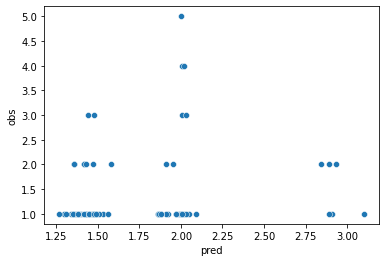

In [ ]:
sns.scatterplot(data=y_preds, x='pred',y='obs')

Let's look at what the background prediction is...

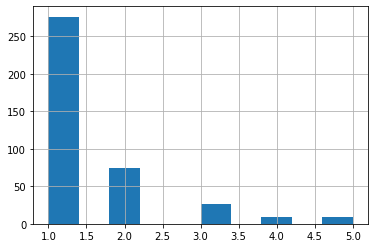

In [ ]:
df.Dalc.hist()

In [ ]:
df.Dalc.mean()

1.481012658227848

Let's see what it thought was important for making predictions

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(forest_regressor, X=X_test, y=y_test, n_repeats=10, n_jobs=2)

forest_importances = pd.DataFrame({'variable':X_test.columns,'impo':result.importances_mean, "sd":result.importances_std})

forest_importances.sort_values(by='impo', ascending=False)

,variable,impo,sd
1,sex,0.118373,0.083898
23,absences,0.013934,0.010201
8,traveltime,0.008774,0.063040
26,G3,0.004717,0.006634
25,G2,0.003555,0.001123
35,Fjob_services,0.002896,0.002663
14,activities,0.002421,0.001286
10,failures,0.002123,0.002045
4,famsize,0.001069,0.002343
31,Mjob_teacher,0.000700,0.000283
